# Section 1: MLP Model Implementation & Experiment Tracking

## 1. Implement a Multi-Layer Perceptron (MLP) Using the Iris Dataset

### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchinfo import summary
from tqdm.auto import tqdm
import wandb

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f"Device: {device}")
print("PyTorch Version:", torch.__version__)
print("CUDA Available:", torch.cuda.is_available())
print("CUDA Version:", torch.version.cuda)
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected")

Device: cuda
PyTorch Version: 2.6.0+cu124
CUDA Available: True
CUDA Version: 12.4
GPU Name: NVIDIA GeForce RTX 4070 Laptop GPU


In [3]:
learning_rate = 1e-3
batch_size = 32
epochs = 500

config = {
    "learning_rate": learning_rate,
    "batch_size": batch_size,
    "epochs": epochs,
    "architecture": "MLP (4-16-3)",
    "activation": "ReLU",
    "loss_function": "CrossEntropyLoss",
    "optimizer": "Adam",
    "layers": 3,
    "neurons": { 
        "input": 4, 
        "hidden": 16, 
        "output": 3 
    },
    "trainable_params": 131,
    "non-trainable_params": 0,
    "dataset": "Iris",
}

wandb.init(project="cs203-assignment-6", config=config)
wandb.config.update(config, allow_val_change=True)

print(config)

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: 23110222 (23110222-indian-institute-of-technology-gandhinagar) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


{'learning_rate': 0.001, 'batch_size': 32, 'epochs': 500, 'architecture': 'MLP (4-16-3)', 'activation': 'ReLU', 'loss_function': 'CrossEntropyLoss', 'optimizer': 'Adam', 'layers': 3, 'neurons': {'input': 4, 'hidden': 16, 'output': 3}, 'trainable_params': 131, 'non-trainable_params': 0, 'dataset': 'Iris'}


### Loading the Iris Dataset

In [4]:
iris = load_iris()

X = torch.tensor(iris.data)
y = torch.tensor(iris.target)

display(X.shape, y.shape)

torch.Size([150, 4])

torch.Size([150])

### Normalizing Feature Values to [0, 1] and One-hot Encoding the Labels

In [5]:
scaler = MinMaxScaler()
X = torch.tensor(scaler.fit_transform(X)).to(device)

encoder = OneHotEncoder()
y = torch.tensor(encoder.fit_transform(y.reshape(-1, 1)).toarray()).to(device)

display(X, y)

tensor([[0.2222, 0.6250, 0.0678, 0.0417],
        [0.1667, 0.4167, 0.0678, 0.0417],
        [0.1111, 0.5000, 0.0508, 0.0417],
        [0.0833, 0.4583, 0.0847, 0.0417],
        [0.1944, 0.6667, 0.0678, 0.0417],
        [0.3056, 0.7917, 0.1186, 0.1250],
        [0.0833, 0.5833, 0.0678, 0.0833],
        [0.1944, 0.5833, 0.0847, 0.0417],
        [0.0278, 0.3750, 0.0678, 0.0417],
        [0.1667, 0.4583, 0.0847, 0.0000],
        [0.3056, 0.7083, 0.0847, 0.0417],
        [0.1389, 0.5833, 0.1017, 0.0417],
        [0.1389, 0.4167, 0.0678, 0.0000],
        [0.0000, 0.4167, 0.0169, 0.0000],
        [0.4167, 0.8333, 0.0339, 0.0417],
        [0.3889, 1.0000, 0.0847, 0.1250],
        [0.3056, 0.7917, 0.0508, 0.1250],
        [0.2222, 0.6250, 0.0678, 0.0833],
        [0.3889, 0.7500, 0.1186, 0.0833],
        [0.2222, 0.7500, 0.0847, 0.0833],
        [0.3056, 0.5833, 0.1186, 0.0417],
        [0.2222, 0.7083, 0.0847, 0.1250],
        [0.0833, 0.6667, 0.0000, 0.0417],
        [0.2222, 0.5417, 0.1186, 0

tensor([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1

In [6]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

display(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

torch.Size([105, 4])

torch.Size([15, 4])

torch.Size([30, 4])

torch.Size([105, 3])

torch.Size([15, 3])

torch.Size([30, 3])

In [7]:
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 4]), torch.Size([32, 3]))

## 2. Define and Train the MLP Model

### Model Definition (MLP)

In [8]:
model = nn.Sequential(
    nn.Linear(4, 16),
    nn.ReLU(),
    nn.Linear(16, 3),
    nn.Softmax(dim=1)
).to(device)

summary(model, input_size=(batch_size, 4))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [32, 3]                   --
├─Linear: 1-1                            [32, 16]                  80
├─ReLU: 1-2                              [32, 16]                  --
├─Linear: 1-3                            [32, 3]                   51
├─Softmax: 1-4                           [32, 3]                   --
Total params: 131
Trainable params: 131
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.01

### Training the Model

In [9]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

torch.manual_seed(42)
train_losses, val_losses = [], []

epoch_loop = tqdm(range(epochs), desc="Training Progress", total=epochs)

for epoch in range(epochs):
    model.train()
    train_loss = 0
    for X_batch, y_batch in train_dataloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        y_pred = model(X_batch.float())
        loss = loss_fn(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        
    train_losses.append(train_loss / len(train_dataloader))
    model.eval()
    with torch.no_grad():
        y_val_pred = model(X_val.float())
        val_loss = loss_fn(y_val_pred, y_val).item()

    val_losses.append(val_loss)

    wandb.log({
        "epoch": epoch+1, 
        "train_loss": train_losses[-1], 
        "val_loss": val_losses[-1]
    }, commit=True)

    print({
        "epoch": epoch+1, 
        "train_loss": train_losses[-1], 
        "val_loss": val_losses[-1]
    })
    
    epoch_loop.update(1)
    epoch_loop.set_description(f"Epoch {epoch+1}/{epochs}")
    epoch_loop.set_postfix(train_loss=train_losses[-1], val_loss=val_losses[-1])

epoch_loop.close()

Training Progress:   0%|          | 0/500 [00:00<?, ?it/s]

{'epoch': 1, 'train_loss': 1.1076380423166685, 'val_loss': 1.1184950669606526}
{'epoch': 2, 'train_loss': 1.1024088414592876, 'val_loss': 1.1173643032709757}
{'epoch': 3, 'train_loss': 1.0969621324911714, 'val_loss': 1.116293700536092}
{'epoch': 4, 'train_loss': 1.1006079782835312, 'val_loss': 1.1157673835754394}
{'epoch': 5, 'train_loss': 1.095529809076753, 'val_loss': 1.1151066621144612}
{'epoch': 6, 'train_loss': 1.0991388447582722, 'val_loss': 1.114312513669332}
{'epoch': 7, 'train_loss': 1.0906403732175627, 'val_loss': 1.1133387009302775}
{'epoch': 8, 'train_loss': 1.0887765226264794, 'val_loss': 1.112673004468282}
{'epoch': 9, 'train_loss': 1.0960845548866525, 'val_loss': 1.111895457903544}
{'epoch': 10, 'train_loss': 1.0995344580668542, 'val_loss': 1.1108688910802205}
{'epoch': 11, 'train_loss': 1.0869661095655627, 'val_loss': 1.109644595781962}
{'epoch': 12, 'train_loss': 1.088134624167449, 'val_loss': 1.1087634245554605}
{'epoch': 13, 'train_loss': 1.0897357675971255, 'val_los

### Accuracy Metrics

array([0, 2, 2, 0, 2, 1, 1, 0, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 2, 0, 0,
       2, 1, 0, 0, 0, 0, 0, 0])

array([0, 2, 2, 0, 2, 1, 1, 0, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 2, 0, 0,
       2, 1, 0, 0, 0, 0, 0, 0])

{'test_accuracy': 0.9666666666666667, 'precision': 0.9708333333333333, 'recall': 0.9666666666666667, 'f1_score': 0.9669841269841268}


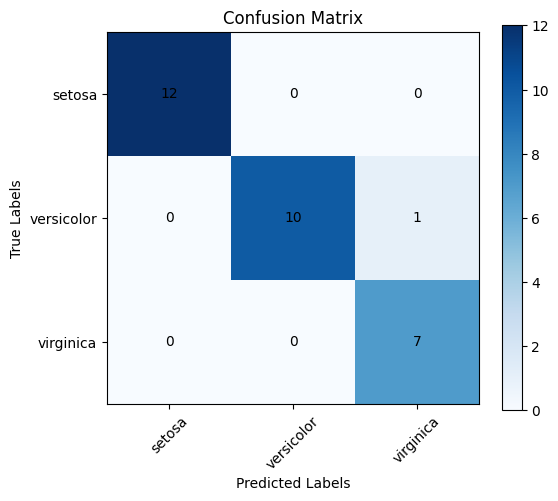

epoch,▁▁▁▁▂▂▂▂▃▃▃▃▃▃▃▃▃▃▃▃▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇█
f1_score,▁
precision,▁
recall,▁
test_accuracy,▁
train_loss,████▇▇▇▆▆▅▅▄▄▄▄▄▃▃▃▃▂▃▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁
val_loss,█████▇▇▇▆▅▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,500
f1_score,0.96698
precision,0.97083
recall,0.96667


In [10]:
X_test, y_test = X_test.to(device), y_test.to(device)

model.eval()
with torch.inference_mode():
    y_test_pred = model(X_test.float())
    test_loss = loss_fn(y_test_pred, y_test).item()
    test_acc = (y_test_pred.argmax(1) == y_test.argmax(1)).sum().item() / len(y_test)

y_true = torch.argmax(y_test, dim=1).cpu().numpy()
y_pred = y_test_pred.argmax(1).cpu().numpy()

display(y_true, y_pred)

accuracy = accuracy_score(y_true, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")

print({
    "test_accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1_score": f1_score
})

wandb.log({
    "test_accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1_score": f1_score
}, commit=True)

conf_matrix = confusion_matrix(y_true, y_pred)

class_labels = iris.target_names
tick_marks = np.arange(len(class_labels))
fig, ax = plt.subplots(figsize=(6,5))
im = ax.imshow(conf_matrix, cmap="Blues", interpolation="nearest")

plt.colorbar(im)

ax.set_xticks(np.arange(len(class_labels)))
ax.set_yticks(np.arange(len(class_labels)))
ax.set_xticklabels(class_labels, rotation=45)
ax.set_yticklabels(class_labels)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("Confusion Matrix")

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j, i, str(conf_matrix[i, j]), ha="center", va="center", color="black")

wandb.log({
    "Confusion Matrix": wandb.Image(fig)
}, commit=True)

plt.show()
plt.close(fig)

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(range(1, epochs+1), train_losses, label="Training Loss")
ax.plot(range(1, epochs+1), val_losses, label="Validation Loss")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Training & Validation Loss Curve")
ax.legend()

wandb.log({
    "Loss Curve": 
    wandb.Image(fig)
}, commit=True)

plt.close(fig)
wandb.finish()